episodic_only
- mean 46.32
- std 3.85

semantic_only
- mean 56.84
- std 1.23

random
- mean 35.6 
- std 4.90

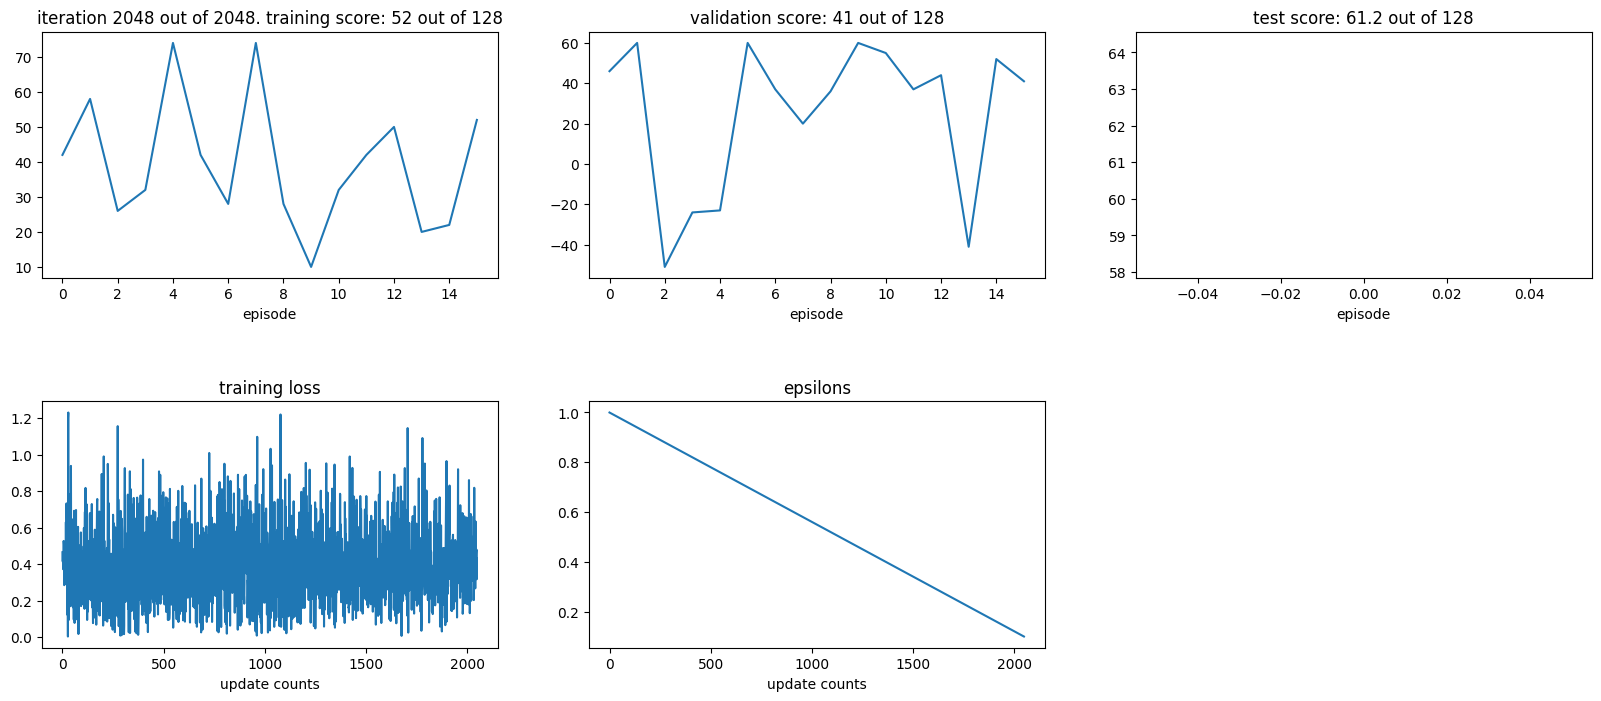

In [1]:
import logging

logger = logging.getLogger()
logger.disabled = True

from agent import DQNAgent, HandcraftedAgent

for train_seed in [0, 1, 2, 3, 4]:
    for pretrain_semantic in [True, False]:
        # parameters
        all_params = {
            "env_str": "room_env:RoomEnv-v1",
            "max_epsilon": 1.0,
            "min_epsilon": 0.1,
            "gamma": 0.65,
            "capacity": {"episodic": 16, "semantic": 16, "short": 1},
            "nn_params": {
                "hidden_size": 64,
                "num_layers": 2,
                "n_actions": 3,
                "embedding_dim": 32,
                "include_human": "sum",
            },
            "num_iterations": 2048,
            "replay_buffer_size": 1024,
            "batch_size": 4,
            "target_update_rate": 10,
            "epsilon_decay_until": 2048,
            "pretrain_semantic": pretrain_semantic,
            "run_validation": True,
            "run_test": True,
            "num_samples_for_results": 10,
            "train_seed": train_seed,
            "plotting_interval": 10,
            "device": "cpu",
            "test_seed": train_seed + 5,
        }

        agent = DQNAgent(**all_params)
        agent.train()


In [ ]:
128 * 8


1024

In [ ]:
agent.memory_systems


{'episodic': {   '_frozen': False,
     'capacity': 16,
     'entries': [   {   'human': 'Alexander',
                        'object': 'keyboard',
                        'object_location': 'desk',
                        'timestamp': 0},
                    {   'human': 'Anthony',
                        'object': 'sheep',
                        'object_location': 'farm',
                        'timestamp': 3},
                    {   'human': 'Arthur',
                        'object': 'donut',
                        'object_location': 'bakery',
                        'timestamp': 4},
                    {   'human': 'Barbara',
                        'object': 'donut',
                        'object_location': 'lap',
                        'timestamp': 5},
                    {   'human': 'Beverly',
                        'object': 'train',
                        'object_location': 'zoo',
                        'timestamp': 6},
                    {   'human': 'Billy',
   

In [ ]:
# for test_seed in [0, 1, 2, 3, 4]:
#     all_params = {
#         "env_str": "room_env:RoomEnv-v1",
#         "policy": "semantic_only",
#         "num_samples_for_results": 10,
#         "capacity": {"episodic": 0, "semantic": 32, "short": 1},
#         "test_seed": test_seed,
#     }
#     all_params["test_seed"] = test_seed
#     agent = HandcraftedAgent(**all_params)
#     agent.test()


In [ ]:
from glob import glob
import yaml
import numpy as np

results = glob("./training_results/episodic_only_agent/*/results.yaml")
scores = []
for file in results:
    with open(file, "r") as f:
        results = yaml.load(f, Loader=yaml.FullLoader)

    scores.append(results["test_score"]["mean"])
print(np.mean(scores), np.std(scores))


46.32000000000001 3.848324310657823


In [ ]:
from glob import glob
import yaml
import numpy as np

results = glob("./training_results/semantic_only_agent/*/results.yaml")
scores = []
for file in results:
    with open(file, "r") as f:
        results = yaml.load(f, Loader=yaml.FullLoader)

    scores.append(results["test_score"]["mean"])
print(np.mean(scores), np.std(scores))


56.839999999999996 1.2799999999999994


In [ ]:
from glob import glob
import yaml
import numpy as np

results = glob("./training_results/random_agent/*/results.yaml")
scores = []
for file in results:
    with open(file, "r") as f:
        results = yaml.load(f, Loader=yaml.FullLoader)

    scores.append(results["test_score"]["mean"])
print(np.mean(scores), np.std(scores))


37.92 2.141401410291869


In [ ]:
# heights: 50.4, stds: 8.429
# heights: 58.0, stds: 9.381
# heights: 33.8, stds: 9.569
# heights: 89.32000122070312, stds: 4.021143669546528
# heights: 110.71999969482422, stds: 3.5181795198362273
